In [1]:
import pickle5 as pickle
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
import pandas as pd

import seaborn as sns

## Train Data

In [2]:
with open('intermediate_files/Final_train_feature.pkl', "rb") as fh:
    dft = pickle.load(fh)

In [3]:
#sarcastic
dfs=dft.loc[dft['label']==1].iloc[:]

#non-sarcastic
dfns=dft.loc[dft['label']==0].iloc[:]


In [4]:
dfs

review  rating  label  \
2    Another movie to ignore.... A perfect date mov...     1.0      1   
5    Heaven Sent It is almost blasphemic to use mor...     5.0      1   
6    Liberals write your own book! I did buy this b...     5.0      1   
8    Corny and idiotic to the tenth degree. I found...     1.0      1   
11   Should Be Titled 'How to Live In Poverty Forev...     2.0      1   
..                                                 ...     ...    ...   
640  Blinking Lights Hurt My Eyes The constant blin...     1.0      1   
641  Synthetic turkey headware at long last!! Like ...     3.0      1   
644  Buyer Beware I suppose my first clue this watc...     1.0      1   
646  Not A Good Helmet! I bought this helmet to use...     1.0      1   
648  be very CAREFUL!!!! This is good phone. It is ...     1.0      1   

                                            bigram_set  bigram_wt  \
2    [another movie, movie to, to ignore, ignore pe...   0.311940   
5    [heaven sent, sent it, it is, is almost, almos...   0.042727   
6    [liberals write, write your, your own, own boo...   0.118390   
8    [corny and, and idiotic, idiotic to, to the, t...   0.014010   
11   [should be, be titled, titled how, how to, to ...   0.019109   
..                                                 ...        ...   
640  [blinking lights, lights hurt, hurt my, my eye...   0.123606   
641  [synthetic turkey, turkey headware, headware a...   0.071060   
644  [buyer beware, beware suppose, suppose my, my ...   0.075309   
646  [not good, good helmet, bought this, this helm...   0.082511   
648  [be very, very careful, this is, is good, good...   0.047511   

                                           trigram_set  trigram_wt  \
2    [another movie to, movie to ignore, to ignore ...    0.379079   
5    [heaven sent it, sent it is, it is almost, is ...    0.052705   
6    [liberals write your, write your own, your own...    0.129242   
8    [corny and idiotic, and idiotic to, idiotic to...    0.015305   
11   [should be titled, be titled how, titled how t...    0.018840   
..                                                 ...         ...   
640  [blinking lights hurt, lights hurt my, hurt my...    0.141545   
641  [synthetic turkey headware, turkey headware at...    0.082819   
644  [buyer beware suppose, beware suppose my, supp...    0.088964   
646  [not good helmet, bought this helmet, this hel...    0.086426   
648  [be very careful, this is good, is good phone,...    0.057130   

                                         bigram_posSet  bigram_posWt  \
2    [dt nn, nn to, to nn, nn dt, nn nn, nn rb, rb ...      0.474911   
5    [nn nn, nn prp, prp vbz, vbz rb, rb nn, nn to,...      0.060212   
6    [nns nn, nn prp, prp jj, jj nn, nn nn, nn vbd,...      0.150031   
8    [nn cc, cc jj, jj to, to dt, dt nn, nn nn, nn ...      0.028622   
11   [md vb, vb vbn, vbn wrb, wrb to, to jj, jj in,...      0.031952   
..                                                 ...           ...   
640  [nn nns, nns nn, nn prp, prp nns, nns dt, dt j...      0.155976   
641  [jj nn, nn nn, nn in, in rb, rb jj, jj in, in ...      0.127702   
644  [nn nn, nn prp, prp rb, rb nn, nn dt, dt nn, n...      0.115677   
646  [rb dt, dt jj, jj nn, nn nn, nn dt, dt nn, nn ...      0.145959   
648  [vb rb, rb nn, nn dt, dt vbz, vbz jj, jj nn, n...      0.080911   

                                        trigram_posSet  trigram_posWt  \
2    [dt nn to, nn to nn, to nn dt, nn dt nn, dt nn...       0.466163   
5    [nn nn prp, nn prp vbz, prp vbz rb, vbz rb nn,...       0.058477   
6    [nns nn prp, nn prp jj, prp jj nn, jj nn nn, n...       0.137380   
8    [nn cc jj, cc jj to, jj to dt, to dt nn, dt nn...       0.024882   
11   [md vb vbn, vb vbn wrb, vbn wrb to, wrb to jj,...       0.026296   
..                                                 ...            ...   
640  [nn nns nn, nns nn prp, nn prp nns, prp nns dt...       0.145234   
641  [jj nn nn, nn nn in, nn in rb, in rb jj, rb jj.

## Sarcastic Train Data semigraph

In [5]:
def graphS():
    Gs=nx.MultiGraph()
    doc_count=1
    for bigW, triW, pbigW, ptriW, intjW, puncW, hypW, bigS, triS, pbigS, ptriS, intjS, puncS, hypS in zip(dfs['bigram_wt'],dfs['trigram_wt'],
                                                                   dfs['bigram_posWt'],dfs['trigram_posWt'],
                                                                   dfs['intj_wt'],dfs['punc_wt'],dfs['hyper_wt'],
                                                                   dfs['bigram_set'],dfs['trigram_set'],dfs['bigram_posSet'],
                                                                   dfs['trigram_posSet'],dfs['intj_set'],
                                                                   dfs['punc_set'],dfs['hyper_set']):
        i=1
        Gs.add_node(str(doc_count)+'S_'+str(i),score=bigW,sett=bigS)
        i+=1
        Gs.add_node(str(doc_count)+'S_'+str(i),score=triW,sett=triS)
        i+=1
        Gs.add_node(str(doc_count)+'S_'+str(i),score=pbigW,sett=pbigS)
        i+=1
        Gs.add_node(str(doc_count)+'S_'+str(i),score=ptriW,sett=ptriS)
        i+=1
        Gs.add_node(str(doc_count)+'S_'+str(i),score=intjW,sett=intjS)
        i+=1
        Gs.add_node(str(doc_count)+'S_'+str(i),score=puncW,sett=puncS)
        i+=1
        Gs.add_node(str(doc_count)+'S_'+str(i),score=hypW,sett=hypS)

        Gs.add_edges_from([(str(doc_count)+'S_1',str(doc_count)+'S_2'),
                           (str(doc_count)+'S_2',str(doc_count)+'S_3'),
                           (str(doc_count)+'S_3',str(doc_count)+'S_4'),
                           (str(doc_count)+'S_4',str(doc_count)+'S_5'),
                           (str(doc_count)+'S_5',str(doc_count)+'S_6'),
                           (str(doc_count)+'S_6',str(doc_count)+'S_7')])
        doc_count+=1
    return Gs

## Non-Sarcastic Train Data Graph

In [6]:
def graphNS():
    Gns=nx.MultiGraph()
    doc_count=1
    for bigW, triW, pbigW, ptriW, intjW, puncW, hypW, bigS, triS, pbigS, ptriS, intjS, puncS, hypS in zip(dfns['bigram_wt'],dfns['trigram_wt'],
                                                                   dfns['bigram_posWt'],dfns['trigram_posWt'],
                                                                   dfns['intj_wt'],dfns['punc_wt'],dfns['hyper_wt'],
                                                                   dfns['bigram_set'],dfns['trigram_set'],dfns['bigram_posSet'],
                                                                   dfns['trigram_posSet'],dfns['intj_set'],
                                                                   dfns['punc_set'],dfns['hyper_set']):
        i=1
        Gns.add_node(str(doc_count)+'N_'+str(i),score=bigW,sett=bigS)
        i+=1
        Gns.add_node(str(doc_count)+'N_'+str(i),score=triW,sett=triS)
        i+=1
        Gns.add_node(str(doc_count)+'N_'+str(i),score=pbigW,sett=pbigS)
        i+=1
        Gns.add_node(str(doc_count)+'N_'+str(i),score=ptriW,sett=ptriS)
        i+=1
        Gns.add_node(str(doc_count)+'N_'+str(i),score=intjW,sett=intjS)
        i+=1
        Gns.add_node(str(doc_count)+'N_'+str(i),score=puncW,sett=puncS)
        i+=1
        Gns.add_node(str(doc_count)+'N_'+str(i),score=hypW,sett=hypS)

        Gns.add_edges_from([(str(doc_count)+'N_1',str(doc_count)+'N_2'),
                           (str(doc_count)+'N_2',str(doc_count)+'N_3'),
                           (str(doc_count)+'N_3',str(doc_count)+'N_4'),
                           (str(doc_count)+'N_4',str(doc_count)+'N_5'),
                           (str(doc_count)+'N_5',str(doc_count)+'N_6'),
                           (str(doc_count)+'N_6',str(doc_count)+'N_7')])
        doc_count+=1
    return Gns

In [7]:
abc=dft.copy()

## Test Data

In [8]:
## Test Data
with open('intermediate_files/Final_test_feature.pkl', "rb") as fh:
    dftest = pickle.load(fh)

In [9]:
dftest.head()

review  rating  label  \
0  Great Alyssa, but rather boring movie This is ...     2.0      0   
1  worst ever If this was written by Danielle Ste...     1.0      1   
2  Hasselhoff Me!  Please! One was having a parti...     5.0      1   
3  One Friday, Without the Milk He always brought...     3.0      1   
4  this. sucked. bad. one word: punctuation. ok, ...     1.0      1   

                                          bigram_set  \
0  [great alyssa, alyssa but, but rather, rather ...   
1  [worst ever, ever if, if this, this was, was w...   
2  [hasselhoff me, one was, was having, having pa...   
3  [one friday, friday without, without the, the ...   
4  [one word, word punctuation, ok folks, folks h...   

                                         trigram_set  \
0  [great alyssa but, alyssa but rather, but rath...   
1  [worst ever if, ever if this, if this was, thi...   
2  [one was having, was having particularly, havi...   
3  [one friday without, friday without the, witho...   
4  [one word punctuation, ok folks heres, folks h...   

                                       bigram_posSet  \
0  [jj nn, nn cc, cc rb, rb nn, nn nn, nn dt, dt ...   
1  [jjs rb, rb in, in dt, dt vbd, vbd vbn, vbn in...   
2  [nn prp, prp nn, nn cd, cd vbd, vbd vbg, vbg d...   
3  [cd nn, nn in, in dt, dt nn, nn prp, prp rb, r...   
4  [dt vbn, vbn jj, jj cd, cd nn, nn nn, nn nns, ...   

                                      trigram_posSet  \
0  [jj nn cc, nn cc rb, cc rb nn, rb nn nn, nn nn...   
1  [jjs rb in, rb in dt, in dt vbd, dt vbd vbn, v...   
2  [nn prp nn, prp nn cd, nn cd vbd, cd vbd vbg, ...   
3  [cd nn in, nn in dt, in dt nn, dt nn prp, nn p...   
4  [dt vbn jj, vbn jj cd, jj cd nn, cd nn nn, nn ...   

                                           hyper_set         punc_set  \
0              [very little, very sexy, really good]           [., ']   
1                      [so bad, very least, how bad]        [., !, ']   
2  [particularly good, quite refreshed, particula...  [', !, ?, ., "]   
3                                                        [?, ., ', "]   
4     [thuroughly impossible, mildly understandable]        [?, ., !]   

         intj_set  
0              []  
1              []  
2    [ha, please]  
3  [oz, wa, well]  
4  [ok, oh, like]

## Test Data Graph

In [10]:
def graphT():
    Gt=nx.MultiGraph()
    doc_count=1
    for bigS, triS, pbigS, ptriS, intjS, puncS, hypS in zip(dftest['bigram_set'],dftest['trigram_set'],dftest['bigram_posSet'],
                                                                   dftest['trigram_posSet'],dftest['intj_set'],
                                                                   dftest['punc_set'],dftest['hyper_set']):
        i=1
        Gt.add_node('test'+str(doc_count)+'_'+str(i),sett=bigS)
        i+=1
        Gt.add_node('test'+str(doc_count)+'_'+str(i),sett=triS)
        i+=1
        Gt.add_node('test'+str(doc_count)+'_'+str(i),sett=pbigS)
        i+=1
        Gt.add_node('test'+str(doc_count)+'_'+str(i),sett=ptriS)
        i+=1
        Gt.add_node('test'+str(doc_count)+'_'+str(i),sett=intjS)
        i+=1
        Gt.add_node('test'+str(doc_count)+'_'+str(i),sett=puncS)
        i+=1
        Gt.add_node('test'+str(doc_count)+'_'+str(i),sett=hypS)

        Gt.add_edges_from([('test'+str(doc_count)+'_1','test'+str(doc_count)+'_2'),
                           ('test'+str(doc_count)+'_2','test'+str(doc_count)+'_3'),
                           ('test'+str(doc_count)+'_3','test'+str(doc_count)+'_4'),
                           ('test'+str(doc_count)+'_4','test'+str(doc_count)+'_5'),
                           ('test'+str(doc_count)+'_5','test'+str(doc_count)+'_6'),
                           ('test'+str(doc_count)+'_6','test'+str(doc_count)+'_7')])
        doc_count+=1
        
    return Gt

## Combine three graphs 

In [11]:
#for combine sarcastic and test graphs 
def graphBuild():
    Gs = graphS()
    Gns = graphNS()
    Gt = graphT()
    gst = nx.compose(Gs,Gns)
    gst = nx.compose(gst,Gt)
    return gst

## Add weighted edge between test - sarcastic nodes And test - Nonsarcastic nodes

In [12]:

def edgeAdd(n): # 'n' is o. of comparisons
    gst = graphBuild()
    comp_len=n
    for i in tqdm(range(1,len(dftest)+1)):
        for j in range(1,8):
            for k in range(1,len(dfs)+1):
                for l in range(1,8):
                    if (j==l):
                        tsett=gst.nodes().data()['test'+str(i)+'_'+str(j)]['sett']
                        ssett=gst.nodes().data()[str(k)+'S_'+str(l)]['sett']

                        length=len(set(ssett).intersection(tsett))
                        
                        if length>=comp_len:
                            wt=gst.nodes().data()[str(k)+'S_'+str(l)]['score']
                            gst.add_edge('test'+str(i)+'_'+str(j),str(k)+'S_'+str(l),weight=length*wt)
                    elif (j==1 and l==7):
                        tsett=gst.nodes().data()['test'+str(i)+'_'+str(j)]['sett']
                        ssett=gst.nodes().data()[str(k)+'S_'+str(l)]['sett']


                        length=len(set(ssett).intersection(tsett))
                        if length>=comp_len:
                            wt=gst.nodes().data()[str(k)+'S_'+str(l)]['score']
                            gst.add_edge('test'+str(i)+'_'+str(j),str(k)+'S_'+str(l),weight=length*wt)
                    elif (j==7 and l==1):
                        tsett=gst.nodes().data()['test'+str(i)+'_'+str(j)]['sett']
                        ssett=gst.nodes().data()[str(k)+'S_'+str(l)]['sett']

                        length=len(set(ssett).intersection(tsett))
                        if length>=comp_len:
                            wt=gst.nodes().data()[str(k)+'S_'+str(l)]['score']
                            gst.add_edge('test'+str(i)+'_'+str(j),str(k)+'S_'+str(l),weight=length*wt)     
            #-----------------------------------(for Non-sarcastic)
            for k in range(1,len(dfns)+1):
                for l in range(1,8):
                    if (j==l):
                        tsett=gst.nodes().data()['test'+str(i)+'_'+str(j)]['sett']
                        ssett=gst.nodes().data()[str(k)+'N_'+str(l)]['sett']
                        
                        length=len(set(ssett).intersection(tsett))
                        
                        
                        if length>=comp_len:
                            wt=gst.nodes().data()[str(k)+'N_'+str(l)]['score']
                            gst.add_edge('test'+str(i)+'_'+str(j),str(k)+'N_'+str(l),weight=length*wt)
                    elif (j==1 and l==7):
                        tsett=gst.nodes().data()['test'+str(i)+'_'+str(j)]['sett']
                        ssett=gst.nodes().data()[str(k)+'N_'+str(l)]['sett']

                        length=len(set(ssett).intersection(tsett))
                        if length>=comp_len:
                            wt=gst.nodes().data()[str(k)+'N_'+str(l)]['score']
                            gst.add_edge('test'+str(i)+'_'+str(j),str(k)+'N_'+str(l),weight=length*wt)
                    elif (j==7 and l==1):
                        tsett=gst.nodes().data()['test'+str(i)+'_'+str(j)]['sett']
                        ssett=gst.nodes().data()[str(k)+'N_'+str(l)]['sett']

                        length=len(set(ssett).intersection(tsett))
                        if length>=comp_len:
                            wt=gst.nodes().data()[str(k)+'N_'+str(l)]['score']
                            gst.add_edge('test'+str(i)+'_'+str(j),str(k)+'N_'+str(l),weight=length*wt)    
    return gst

## Visualize actual semigraph

100%|██████████| 218/218 [00:22<00:00,  9.62it/s]


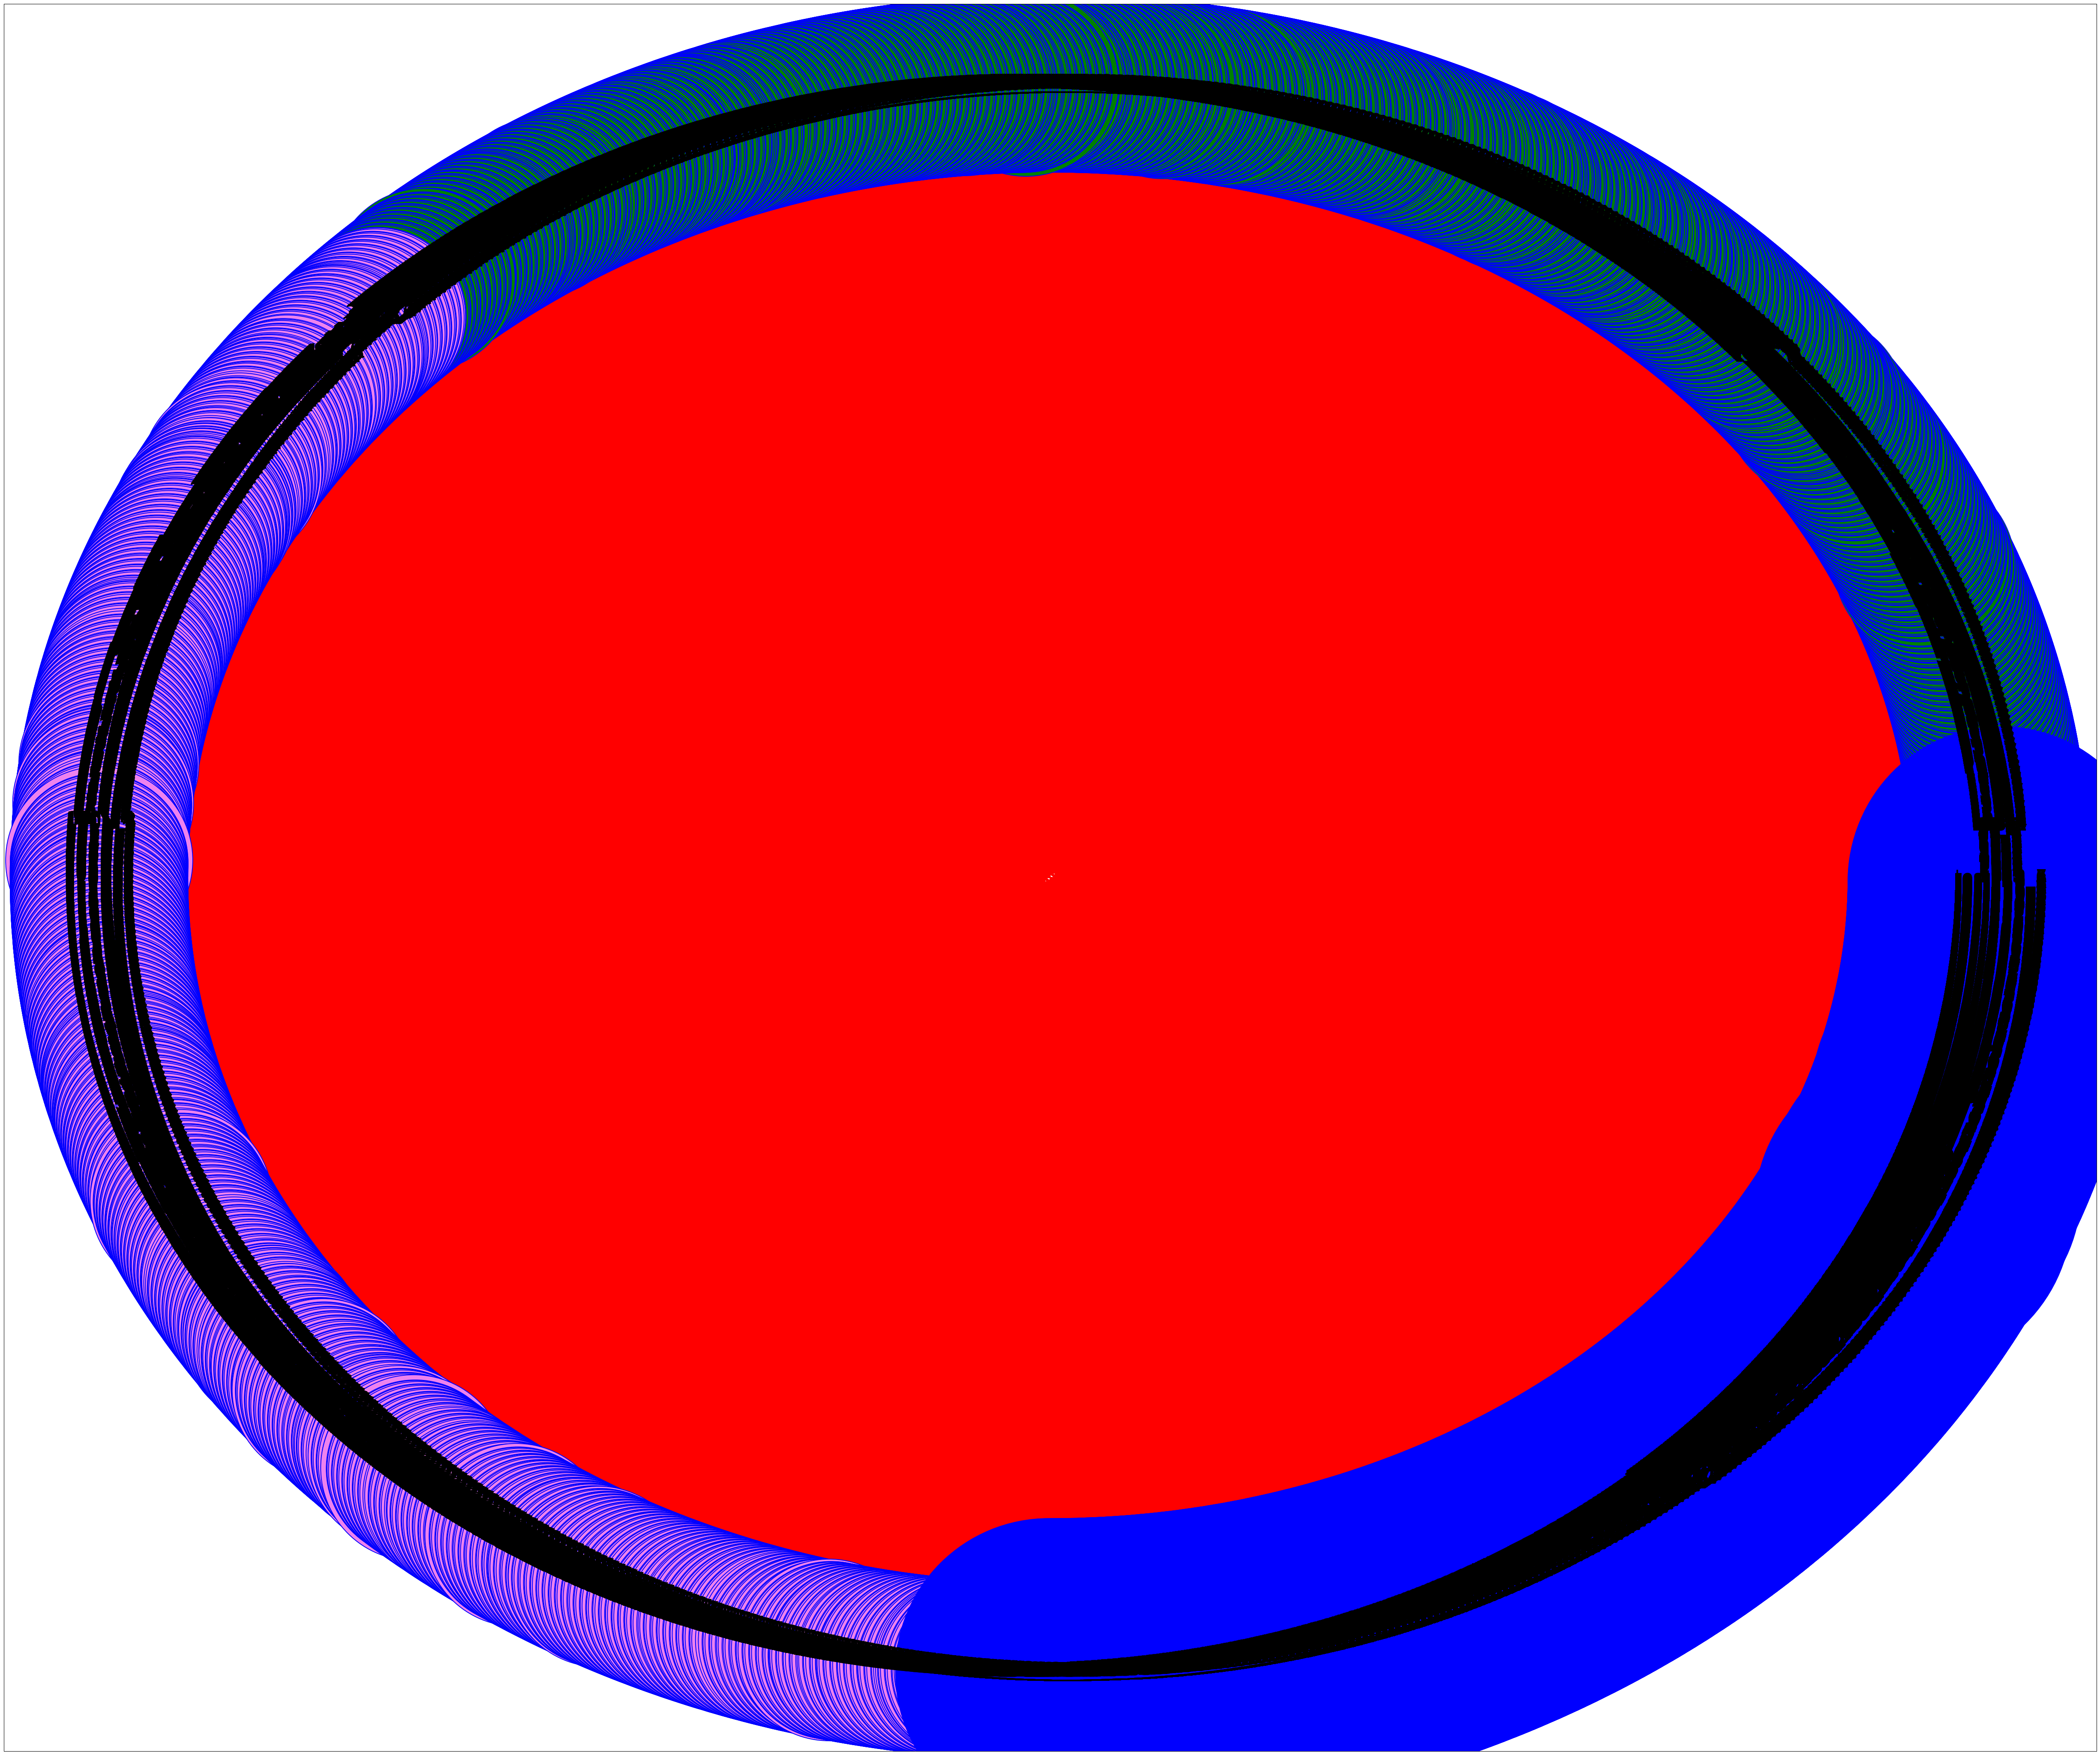

In [13]:
gst = edgeAdd(1)

#plot graph
plt.figure(num=None, figsize=(70, 60), dpi=90)
color_map = []
for node in gst:
    if 'test' in node:
        color_map.append('blue')
    elif 'N' in node:
        color_map.append('violet')
    else: 
        color_map.append('green')      
#nx.draw(gst, node_color=color_map, with_labels=True)
layout=nx.circular_layout(gst)
#layout=nx.nx_pydot.graphviz_layout(gst)

node_deg = nx.degree(gst)
nx.draw_networkx(
    gst,
    node_size=[int(deg[1])*500 for deg in node_deg],
    arrowsize=30,
    linewidths=1.5,
    pos=layout,
    edge_color='red',
    edgecolors='blue',
    node_color=color_map,
    with_labels=True,
    font_size=35
    )


## Test document score calculation

In [14]:
def scoreCalculation(n):
    gst = edgeAdd(n)
    Stotal_score=[]
    Ntotal_score=[]
    for i in tqdm(range(1,len(dftest)+1)):
        Stlist=[]
        Ntlist=[]
        for j in range(1,8):
            weights=[]
            for  key in gst.neighbors('test'+str(i)+'_'+str(j)):
                if 'test' not in key and 'N' not in key:
                    weights.append(gst.get_edge_data('test'+str(i)+'_'+str(j),key)[0]['weight'])

            t_score=(np.sum(weights))*len(weights)
            Stlist.append(t_score)

        #-----------------(for non-sarcastic wt)
        for j in range(1,8):
            weights=[]
            for  key in gst.neighbors('test'+str(i)+'_'+str(j)):
                if 'test' not in key and 'S' not in key:
                    weights.append(gst.get_edge_data('test'+str(i)+'_'+str(j),key)[0]['weight'])

            t_score=(np.sum(weights))*len(weights)
            Ntlist.append(t_score)

        Stotal_score.append(np.sum(Stlist))
        Ntotal_score.append(np.sum(Ntlist))
    
    return [Stotal_score,Ntotal_score]

    # degree = gst.degree('test'+str(i)+'_'+str(j))-1)

## Evaluation Metrics 

In [15]:
# only two o/p
def acc(n):
    Stotal_score, Ntotal_score=scoreCalculation(n)
    res=pd.DataFrame([list(dftest['review']),Stotal_score,Ntotal_score,list(dftest['label'])]).transpose()
    res.columns=['review','SarcasticScore','NonSarcasticScore','Actual Label']
    
    mm=MinMaxScaler()
    res['SarcasticScore']=mm.fit_transform(res[['SarcasticScore']])
    res['NonSarcasticScore']=mm.fit_transform(res[['NonSarcasticScore']])
    
    y_pred=[]
    for i,j in zip(res['SarcasticScore'],res['NonSarcasticScore']):
        if i>=j:
            y_pred.append(1)
        else:
            y_pred.append(0)

    res['pred_y']=y_pred
    Acc = accuracy_score(list(res['Actual Label']),list(res['pred_y']))
    cls_report = classification_report(list(res['Actual Label']),list(res['pred_y']))
    matrix = confusion_matrix(list(res['Actual Label']),list(res['pred_y']))
    return [Acc,cls_report,matrix,res]
    

In [16]:
result = acc(1)

100%|██████████| 218/218 [00:00<00:00, 365.12it/s]


In [17]:
result[0]

0.6880733944954128

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()
print(analyser.polarity_scores('normal'))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [19]:
pd.DataFrame([-1,1,-0.3])[0]

0   -1.0
1    1.0
2   -0.3
Name: 0, dtype: float64

In [20]:
mm=MinMaxScaler()
print(mm.fit_transform(pd.DataFrame([-1,1,-0.3]))[2][0])

0.35


## Result tunning 

In [21]:
pred=[]
all_dif=[]
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()
mm=MinMaxScaler()
sarc=[]
nsarc=[]
for doc,rating,s,ns in zip(dftest['review'],dftest['rating'],result[3]['SarcasticScore'],result[3]['NonSarcasticScore']):
    sentiment=analyser.polarity_scores(doc)['compound']
    lir=[0,5,rating]
    li=[1,-1,sentiment]
    li=mm.fit_transform(pd.DataFrame(li))
    lir=mm.fit_transform(pd.DataFrame(lir))
    sentiment=li[2][0]
    rating=lir[2][0]
    diff=abs(sentiment-rating)
    all_dif.append(diff)
    if diff>=0.09:
        sarc.append(s+diff*0.05)#abs(s-ns)
        nsarc.append(ns)
        pred.append(1)
    else:
        sarc.append(s)
        nsarc.append(ns+(1-diff)*0.05)#abs(s-ns)
        pred.append(0)

In [22]:
result[3]['pred_sent']=pred

In [23]:
result[3]['pred_sent'].value_counts()

1    125
0     93
Name: pred_sent, dtype: int64

In [24]:
y_pred=[]
for i,j in zip(sarc,nsarc):
    if i>=j:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [25]:
accuracy_score(list(result[3]['Actual Label']),y_pred)

0.7568807339449541

<AxesSubplot:>

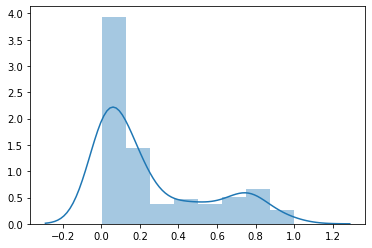

In [180]:
sns.distplot(all_dif)

<AxesSubplot:>

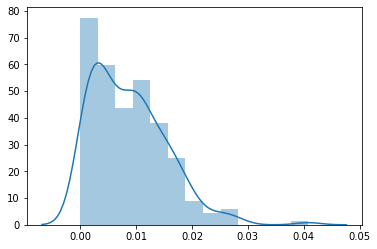

In [176]:
svsn=abs(result[3]['SarcasticScore']-result[3]['NonSarcasticScore'])
sns.distplot(svsn)

In [114]:
result[3]

review  SarcasticScore  \
0    Great Alyssa, but rather boring movie This is ...        0.235827   
1    worst ever If this was written by Danielle Ste...        0.308824   
2    Hasselhoff Me!  Please! One was having a parti...        0.433805   
3    One Friday, Without the Milk He always brought...        0.499512   
4    this. sucked. bad. one word: punctuation. ok, ...        0.253194   
..                                                 ...             ...   
213  If dragons could wear t-shirts, this is the on...        0.506112   
214  Horrible Product this product only got one sta...        0.284808   
215  BDP-S560 vs Panasonic DMP-BD80 There seems to ...        0.823537   
216  Great Gift... I know nothing about guitars so ...        0.267963   
217  Finding the Real Treasure Most people born and...        0.579880   

     NonSarcasticScore Actual Label  pred_y  pred_sent  
0             0.249054            0       0          0  
1             0.308964            1       0          0  
2             0.422710            1       1          0  
3             0.487402            1       1          0  
4             0.244486            1       1          0  
..                 ...          ...     ...        ...  
213           0.516976            1       0          0  
214           0.284373            1       1          0  
215           0.829809            0       0          0  
216           0.287217            0       0          0  
217           0.607858            0       0          0  

[218 rows x 6 columns]

## Results and analysis

In [22]:
print(result[1])

              precision    recall  f1-score   support

           0       0.66      0.83      0.73       109
           1       0.77      0.58      0.66       109

    accuracy                           0.70       218
   macro avg       0.72      0.70      0.70       218
weighted avg       0.72      0.70      0.70       218



In [23]:
pres0 = 0.61
pres1 = 0.62
recall0 = 0.63
recall1 = 0.59
f0 = 0.62
f1 = 0.60

In [24]:
result[0]

0.7018348623853211

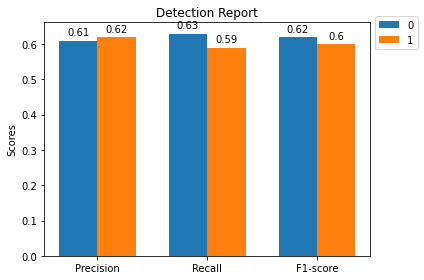

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Precision','Recall','F1-score']
men_means = [pres0,recall0,f0]   
women_means = [pres1,recall1,f1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='0')
rects2 = ax.bar(x + width/2, women_means, width, label='1')

#plt.bar(2.75,result[0],width=0.25,color='red')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Detection Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()
plt.legend(bbox_to_anchor=(1,1.05), loc='upper left')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

<AxesSubplot:>

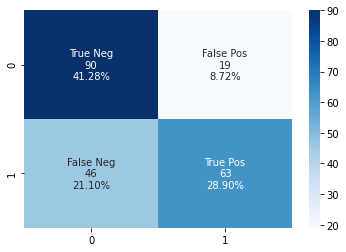

In [26]:
#confusion matrix
cf_matrix = result[2]

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')